# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [54]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [55]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [56]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [57]:
x_train.shape

(160, 1)

In [58]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


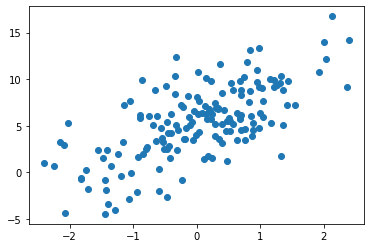

In [59]:
plt.scatter(x_train, y_train)

In [60]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [61]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.001 
epochs = 100



In [62]:
criterion = torch.nn.MSELoss() 

In [63]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs_train = model(inputs_train)
        loss_train = criterion(outputs_train, labels_train)
        loss_train.backward()
        optimizer.step()
        optimizer.zero_grad()
        outputs_test = model(inputs_test)
        loss_test = criterion(outputs_test, labels_test)
        print('h: {} | epoch: {}, train loss: {}, test loss: {}'.format(h, epoch, loss_train.item(), loss_test.item()))
    train_losses.append(loss_train)
    test_losses.append(loss_test)

h: 2 | epoch: 0, train loss: 56.78473663330078, test loss: 51.037025451660156
h: 2 | epoch: 1, train loss: 56.281982421875, test loss: 50.57836151123047
h: 2 | epoch: 2, train loss: 55.7906494140625, test loss: 50.129554748535156
h: 2 | epoch: 3, train loss: 55.31019973754883, test loss: 49.6901741027832
h: 2 | epoch: 4, train loss: 54.84014129638672, test loss: 49.2597770690918
h: 2 | epoch: 5, train loss: 54.37998580932617, test loss: 48.83795928955078
h: 2 | epoch: 6, train loss: 53.929298400878906, test loss: 48.42433547973633
h: 2 | epoch: 7, train loss: 53.487632751464844, test loss: 48.01853561401367
h: 2 | epoch: 8, train loss: 53.05458450317383, test loss: 47.62021255493164
h: 2 | epoch: 9, train loss: 52.6297721862793, test loss: 47.22903060913086
h: 2 | epoch: 10, train loss: 52.21282958984375, test loss: 46.84467697143555
h: 2 | epoch: 11, train loss: 51.80338668823242, test loss: 46.46684265136719
h: 2 | epoch: 12, train loss: 51.40114212036133, test loss: 46.0952377319335

h: 4 | epoch: 38, train loss: 31.604995727539062, test loss: 28.62050437927246
h: 4 | epoch: 39, train loss: 31.382549285888672, test loss: 28.406856536865234
h: 4 | epoch: 40, train loss: 31.15985679626465, test loss: 28.193012237548828
h: 4 | epoch: 41, train loss: 30.936925888061523, test loss: 27.978958129882812
h: 4 | epoch: 42, train loss: 30.713760375976562, test loss: 27.764719009399414
h: 4 | epoch: 43, train loss: 30.490367889404297, test loss: 27.550289154052734
h: 4 | epoch: 44, train loss: 30.26675796508789, test loss: 27.335689544677734
h: 4 | epoch: 45, train loss: 30.042943954467773, test loss: 27.12091064453125
h: 4 | epoch: 46, train loss: 29.818933486938477, test loss: 26.905975341796875
h: 4 | epoch: 47, train loss: 29.594745635986328, test loss: 26.69089698791504
h: 4 | epoch: 48, train loss: 29.37038803100586, test loss: 26.475683212280273
h: 4 | epoch: 49, train loss: 29.145883560180664, test loss: 26.26034164428711
h: 4 | epoch: 50, train loss: 28.92124557495117

h: 6 | epoch: 88, train loss: 16.83184242248535, test loss: 14.168413162231445
h: 6 | epoch: 89, train loss: 16.62872886657715, test loss: 13.97374153137207
h: 6 | epoch: 90, train loss: 16.428752899169922, test loss: 13.781956672668457
h: 6 | epoch: 91, train loss: 16.23192596435547, test loss: 13.593069076538086
h: 6 | epoch: 92, train loss: 16.03826332092285, test loss: 13.40709400177002
h: 6 | epoch: 93, train loss: 15.847776412963867, test loss: 13.224042892456055
h: 6 | epoch: 94, train loss: 15.660479545593262, test loss: 13.043922424316406
h: 6 | epoch: 95, train loss: 15.476373672485352, test loss: 12.866740226745605
h: 6 | epoch: 96, train loss: 15.295465469360352, test loss: 12.692502975463867
h: 6 | epoch: 97, train loss: 15.117761611938477, test loss: 12.521210670471191
h: 6 | epoch: 98, train loss: 14.943258285522461, test loss: 12.352865219116211
h: 6 | epoch: 99, train loss: 14.771960258483887, test loss: 12.187463760375977
h: 7 | epoch: 0, train loss: 39.56805419921875

h: 9 | epoch: 37, train loss: 28.194448471069336, test loss: 24.735380172729492
h: 9 | epoch: 38, train loss: 27.823617935180664, test loss: 24.385944366455078
h: 9 | epoch: 39, train loss: 27.45682716369629, test loss: 24.040285110473633
h: 9 | epoch: 40, train loss: 27.094051361083984, test loss: 23.69839096069336
h: 9 | epoch: 41, train loss: 26.735275268554688, test loss: 23.3602352142334
h: 9 | epoch: 42, train loss: 26.3804874420166, test loss: 23.025798797607422
h: 9 | epoch: 43, train loss: 26.029659271240234, test loss: 22.695087432861328
h: 9 | epoch: 44, train loss: 25.682796478271484, test loss: 22.36808204650879
h: 9 | epoch: 45, train loss: 25.339885711669922, test loss: 22.04476547241211
h: 9 | epoch: 46, train loss: 25.00092315673828, test loss: 21.72515106201172
h: 9 | epoch: 47, train loss: 24.665908813476562, test loss: 21.409223556518555
h: 9 | epoch: 48, train loss: 24.334835052490234, test loss: 21.096988677978516
h: 9 | epoch: 49, train loss: 24.007715225219727, 

h: 11 | epoch: 67, train loss: 18.22818374633789, test loss: 15.405881881713867
h: 11 | epoch: 68, train loss: 17.97734832763672, test loss: 15.169215202331543
h: 11 | epoch: 69, train loss: 17.730876922607422, test loss: 14.936511039733887
h: 11 | epoch: 70, train loss: 17.488765716552734, test loss: 14.70776653289795
h: 11 | epoch: 71, train loss: 17.25100326538086, test loss: 14.482978820800781
h: 11 | epoch: 72, train loss: 17.0175838470459, test loss: 14.262136459350586
h: 11 | epoch: 73, train loss: 16.788497924804688, test loss: 14.045234680175781
h: 11 | epoch: 74, train loss: 16.563730239868164, test loss: 13.832258224487305
h: 11 | epoch: 75, train loss: 16.34326934814453, test loss: 13.623201370239258
h: 11 | epoch: 76, train loss: 16.12710189819336, test loss: 13.41804313659668
h: 11 | epoch: 77, train loss: 15.915204048156738, test loss: 13.216772079467773
h: 11 | epoch: 78, train loss: 15.707559585571289, test loss: 13.019366264343262
h: 11 | epoch: 79, train loss: 15.504

h: 14 | epoch: 30, train loss: 25.8720703125, test loss: 22.803157806396484
h: 14 | epoch: 31, train loss: 25.496816635131836, test loss: 22.45050811767578
h: 14 | epoch: 32, train loss: 25.126432418823242, test loss: 22.102270126342773
h: 14 | epoch: 33, train loss: 24.76091194152832, test loss: 21.75844383239746
h: 14 | epoch: 34, train loss: 24.400236129760742, test loss: 21.419017791748047
h: 14 | epoch: 35, train loss: 24.04440689086914, test loss: 21.0839900970459
h: 14 | epoch: 36, train loss: 23.69341468811035, test loss: 20.75334930419922
h: 14 | epoch: 37, train loss: 23.34724998474121, test loss: 20.427104949951172
h: 14 | epoch: 38, train loss: 23.005922317504883, test loss: 20.10525131225586
h: 14 | epoch: 39, train loss: 22.669418334960938, test loss: 19.787784576416016
h: 14 | epoch: 40, train loss: 22.337743759155273, test loss: 19.474706649780273
h: 14 | epoch: 41, train loss: 22.010896682739258, test loss: 19.166027069091797
h: 14 | epoch: 42, train loss: 21.688877105

h: 16 | epoch: 66, train loss: 12.545751571655273, test loss: 10.137381553649902
h: 16 | epoch: 67, train loss: 12.39454460144043, test loss: 9.986156463623047
h: 16 | epoch: 68, train loss: 12.248266220092773, test loss: 9.83956241607666
h: 16 | epoch: 69, train loss: 12.106799125671387, test loss: 9.697491645812988
h: 16 | epoch: 70, train loss: 11.970026969909668, test loss: 9.559839248657227
h: 16 | epoch: 71, train loss: 11.837830543518066, test loss: 9.426494598388672
h: 16 | epoch: 72, train loss: 11.710094451904297, test loss: 9.297353744506836
h: 16 | epoch: 73, train loss: 11.586705207824707, test loss: 9.17231273651123
h: 16 | epoch: 74, train loss: 11.467547416687012, test loss: 9.05126667022705
h: 16 | epoch: 75, train loss: 11.352508544921875, test loss: 8.934114456176758
h: 16 | epoch: 76, train loss: 11.241479873657227, test loss: 8.82075309753418
h: 16 | epoch: 77, train loss: 11.134347915649414, test loss: 8.71108341217041
h: 16 | epoch: 78, train loss: 11.03100776672

h: 19 | epoch: 25, train loss: 22.024341583251953, test loss: 19.141517639160156
h: 19 | epoch: 26, train loss: 21.43872833251953, test loss: 18.598581314086914
h: 19 | epoch: 27, train loss: 20.875293731689453, test loss: 18.075332641601562
h: 19 | epoch: 28, train loss: 20.333332061767578, test loss: 17.571163177490234
h: 19 | epoch: 29, train loss: 19.812152862548828, test loss: 17.085477828979492
h: 19 | epoch: 30, train loss: 19.311092376708984, test loss: 16.617694854736328
h: 19 | epoch: 31, train loss: 18.829500198364258, test loss: 16.167268753051758
h: 19 | epoch: 32, train loss: 18.36675453186035, test loss: 15.733647346496582
h: 19 | epoch: 33, train loss: 17.922245025634766, test loss: 15.316307067871094
h: 19 | epoch: 34, train loss: 17.49538230895996, test loss: 14.914735794067383
h: 19 | epoch: 35, train loss: 17.085594177246094, test loss: 14.528432846069336
h: 19 | epoch: 36, train loss: 16.69231414794922, test loss: 14.156919479370117
h: 19 | epoch: 37, train loss: 1

h: 21 | epoch: 78, train loss: 9.873629570007324, test loss: 7.497579097747803
h: 21 | epoch: 79, train loss: 9.807334899902344, test loss: 7.4239397048950195
h: 21 | epoch: 80, train loss: 9.744166374206543, test loss: 7.353369235992432
h: 21 | epoch: 81, train loss: 9.683991432189941, test loss: 7.28574275970459
h: 21 | epoch: 82, train loss: 9.626678466796875, test loss: 7.220945835113525
h: 21 | epoch: 83, train loss: 9.572107315063477, test loss: 7.1588640213012695
h: 21 | epoch: 84, train loss: 9.520156860351562, test loss: 7.0993852615356445
h: 21 | epoch: 85, train loss: 9.470711708068848, test loss: 7.042405605316162
h: 21 | epoch: 86, train loss: 9.423660278320312, test loss: 6.987822532653809
h: 21 | epoch: 87, train loss: 9.378896713256836, test loss: 6.935538291931152
h: 21 | epoch: 88, train loss: 9.33631706237793, test loss: 6.885458469390869
h: 21 | epoch: 89, train loss: 9.295825004577637, test loss: 6.837491035461426
h: 21 | epoch: 90, train loss: 9.257322311401367, t

h: 24 | epoch: 27, train loss: 22.087677001953125, test loss: 18.61821937561035
h: 24 | epoch: 28, train loss: 21.65365219116211, test loss: 18.21653938293457
h: 24 | epoch: 29, train loss: 21.231592178344727, test loss: 17.825857162475586
h: 24 | epoch: 30, train loss: 20.821212768554688, test loss: 17.445903778076172
h: 24 | epoch: 31, train loss: 20.422245025634766, test loss: 17.076427459716797
h: 24 | epoch: 32, train loss: 20.0344295501709, test loss: 16.717174530029297
h: 24 | epoch: 33, train loss: 19.65750503540039, test loss: 16.367908477783203
h: 24 | epoch: 34, train loss: 19.291229248046875, test loss: 16.028390884399414
h: 24 | epoch: 35, train loss: 18.93535041809082, test loss: 15.698391914367676
h: 24 | epoch: 36, train loss: 18.589637756347656, test loss: 15.37768840789795
h: 24 | epoch: 37, train loss: 18.253856658935547, test loss: 15.066061019897461
h: 24 | epoch: 38, train loss: 17.927780151367188, test loss: 14.763299942016602
h: 24 | epoch: 39, train loss: 17.61

h: 26 | epoch: 85, train loss: 10.209071159362793, test loss: 7.655404567718506
h: 26 | epoch: 86, train loss: 10.134984016418457, test loss: 7.579171180725098
h: 26 | epoch: 87, train loss: 10.063966751098633, test loss: 7.5058393478393555
h: 26 | epoch: 88, train loss: 9.995909690856934, test loss: 7.43530797958374
h: 26 | epoch: 89, train loss: 9.930705070495605, test loss: 7.367476463317871
h: 26 | epoch: 90, train loss: 9.868246078491211, test loss: 7.302252292633057
h: 26 | epoch: 91, train loss: 9.808429718017578, test loss: 7.2395429611206055
h: 26 | epoch: 92, train loss: 9.751157760620117, test loss: 7.179257392883301
h: 26 | epoch: 93, train loss: 9.696331024169922, test loss: 7.121310234069824
h: 26 | epoch: 94, train loss: 9.643857955932617, test loss: 7.065614223480225
h: 26 | epoch: 95, train loss: 9.593647956848145, test loss: 7.012089729309082
h: 26 | epoch: 96, train loss: 9.545612335205078, test loss: 6.96065616607666
h: 26 | epoch: 97, train loss: 9.499665260314941,

h: 29 | epoch: 17, train loss: 27.017358779907227, test loss: 23.098526000976562
h: 29 | epoch: 18, train loss: 26.18265151977539, test loss: 22.342302322387695
h: 29 | epoch: 19, train loss: 25.382892608642578, test loss: 21.617090225219727
h: 29 | epoch: 20, train loss: 24.61664581298828, test loss: 20.92163848876953
h: 29 | epoch: 21, train loss: 23.882556915283203, test loss: 20.2547550201416
h: 29 | epoch: 22, train loss: 23.179336547851562, test loss: 19.61530113220215
h: 29 | epoch: 23, train loss: 22.50575828552246, test loss: 19.002208709716797
h: 29 | epoch: 24, train loss: 21.86065101623535, test loss: 18.41443634033203
h: 29 | epoch: 25, train loss: 21.242897033691406, test loss: 17.851009368896484
h: 29 | epoch: 26, train loss: 20.65143394470215, test loss: 17.310977935791016
h: 29 | epoch: 27, train loss: 20.085237503051758, test loss: 16.79344367980957
h: 29 | epoch: 28, train loss: 19.543315887451172, test loss: 16.29754066467285
h: 29 | epoch: 29, train loss: 19.024744

h: 31 | epoch: 58, train loss: 9.886299133300781, test loss: 7.409945011138916
h: 31 | epoch: 59, train loss: 9.799226760864258, test loss: 7.3179168701171875
h: 31 | epoch: 60, train loss: 9.717616081237793, test loss: 7.2310380935668945
h: 31 | epoch: 61, train loss: 9.64114761352539, test loss: 7.1490159034729
h: 31 | epoch: 62, train loss: 9.569513320922852, test loss: 7.071585178375244
h: 31 | epoch: 63, train loss: 9.502424240112305, test loss: 6.998485565185547
h: 31 | epoch: 64, train loss: 9.439604759216309, test loss: 6.929476261138916
h: 31 | epoch: 65, train loss: 9.380800247192383, test loss: 6.86432409286499
h: 31 | epoch: 66, train loss: 9.325761795043945, test loss: 6.802814483642578
h: 31 | epoch: 67, train loss: 9.274262428283691, test loss: 6.744741916656494
h: 31 | epoch: 68, train loss: 9.226083755493164, test loss: 6.689910888671875
h: 31 | epoch: 69, train loss: 9.181020736694336, test loss: 6.638134002685547
h: 31 | epoch: 70, train loss: 9.13887882232666, test 

h: 34 | epoch: 5, train loss: 29.894489288330078, test loss: 26.171772003173828
h: 34 | epoch: 6, train loss: 28.78092384338379, test loss: 25.164459228515625
h: 34 | epoch: 7, train loss: 27.72122573852539, test loss: 24.204181671142578
h: 34 | epoch: 8, train loss: 26.712825775146484, test loss: 23.288761138916016
h: 34 | epoch: 9, train loss: 25.753314971923828, test loss: 22.41614532470703
h: 34 | epoch: 10, train loss: 24.840412139892578, test loss: 21.58438491821289
h: 34 | epoch: 11, train loss: 23.971973419189453, test loss: 20.791648864746094
h: 34 | epoch: 12, train loss: 23.14595603942871, test loss: 20.036205291748047
h: 34 | epoch: 13, train loss: 22.360441207885742, test loss: 19.316387176513672
h: 34 | epoch: 14, train loss: 21.613590240478516, test loss: 18.63062858581543
h: 34 | epoch: 15, train loss: 20.903656005859375, test loss: 17.977428436279297
h: 34 | epoch: 16, train loss: 20.22898292541504, test loss: 17.355358123779297
h: 34 | epoch: 17, train loss: 19.587978

h: 36 | epoch: 40, train loss: 12.082982063293457, test loss: 9.505861282348633
h: 36 | epoch: 41, train loss: 11.863567352294922, test loss: 9.292877197265625
h: 36 | epoch: 42, train loss: 11.657183647155762, test loss: 9.091772079467773
h: 36 | epoch: 43, train loss: 11.463115692138672, test loss: 8.901911735534668
h: 36 | epoch: 44, train loss: 11.28067684173584, test loss: 8.722685813903809
h: 36 | epoch: 45, train loss: 11.109217643737793, test loss: 8.553525924682617
h: 36 | epoch: 46, train loss: 10.948121070861816, test loss: 8.393882751464844
h: 36 | epoch: 47, train loss: 10.796797752380371, test loss: 8.243237495422363
h: 36 | epoch: 48, train loss: 10.654696464538574, test loss: 8.101096153259277
h: 36 | epoch: 49, train loss: 10.521282196044922, test loss: 7.9669904708862305
h: 36 | epoch: 50, train loss: 10.39605712890625, test loss: 7.840479373931885
h: 36 | epoch: 51, train loss: 10.278547286987305, test loss: 7.721137046813965
h: 36 | epoch: 52, train loss: 10.1683015

h: 39 | epoch: 8, train loss: 30.203838348388672, test loss: 25.760284423828125
h: 39 | epoch: 9, train loss: 29.153106689453125, test loss: 24.81106185913086
h: 39 | epoch: 10, train loss: 28.154882431030273, test loss: 23.90890884399414
h: 39 | epoch: 11, train loss: 27.206287384033203, test loss: 23.051244735717773
h: 39 | epoch: 12, train loss: 26.30463218688965, test loss: 22.235668182373047
h: 39 | epoch: 13, train loss: 25.447423934936523, test loss: 21.45992660522461
h: 39 | epoch: 14, train loss: 24.63231658935547, test loss: 20.721904754638672
h: 39 | epoch: 15, train loss: 23.857112884521484, test loss: 20.019636154174805
h: 39 | epoch: 16, train loss: 23.119747161865234, test loss: 19.351259231567383
h: 39 | epoch: 17, train loss: 22.418285369873047, test loss: 18.715038299560547
h: 39 | epoch: 18, train loss: 21.75090980529785, test loss: 18.109329223632812
h: 39 | epoch: 19, train loss: 21.11590003967285, test loss: 17.53258514404297
h: 39 | epoch: 20, train loss: 20.5116

h: 41 | epoch: 58, train loss: 10.099555969238281, test loss: 7.682409763336182
h: 41 | epoch: 59, train loss: 10.006303787231445, test loss: 7.583410739898682
h: 41 | epoch: 60, train loss: 9.91840934753418, test loss: 7.489494323730469
h: 41 | epoch: 61, train loss: 9.835587501525879, test loss: 7.400403022766113
h: 41 | epoch: 62, train loss: 9.757563591003418, test loss: 7.315892219543457
h: 41 | epoch: 63, train loss: 9.684080123901367, test loss: 7.235731601715088
h: 41 | epoch: 64, train loss: 9.614887237548828, test loss: 7.1596999168396
h: 41 | epoch: 65, train loss: 9.549752235412598, test loss: 7.08759069442749
h: 41 | epoch: 66, train loss: 9.488450050354004, test loss: 7.019195556640625
h: 41 | epoch: 67, train loss: 9.430767059326172, test loss: 6.9543304443359375
h: 41 | epoch: 68, train loss: 9.376505851745605, test loss: 6.892809867858887
h: 41 | epoch: 69, train loss: 9.325469017028809, test loss: 6.834462642669678
h: 41 | epoch: 70, train loss: 9.27747917175293, test

h: 44 | epoch: 19, train loss: 17.088953018188477, test loss: 14.183337211608887
h: 44 | epoch: 20, train loss: 16.529560089111328, test loss: 13.669337272644043
h: 44 | epoch: 21, train loss: 16.0047550201416, test loss: 13.18579387664795
h: 44 | epoch: 22, train loss: 15.512557983398438, test loss: 12.730993270874023
h: 44 | epoch: 23, train loss: 15.051080703735352, test loss: 12.303311347961426
h: 44 | epoch: 24, train loss: 14.618547439575195, test loss: 11.901212692260742
h: 44 | epoch: 25, train loss: 14.213272094726562, test loss: 11.523239135742188
h: 44 | epoch: 26, train loss: 13.833662033081055, test loss: 11.168013572692871
h: 44 | epoch: 27, train loss: 13.478208541870117, test loss: 10.834227561950684
h: 44 | epoch: 28, train loss: 13.145482063293457, test loss: 10.520647048950195
h: 44 | epoch: 29, train loss: 12.834129333496094, test loss: 10.22610092163086
h: 44 | epoch: 30, train loss: 12.542874336242676, test loss: 9.949485778808594
h: 44 | epoch: 31, train loss: 12

h: 46 | epoch: 61, train loss: 8.872027397155762, test loss: 6.274825096130371
h: 46 | epoch: 62, train loss: 8.84642219543457, test loss: 6.241312503814697
h: 46 | epoch: 63, train loss: 8.822824478149414, test loss: 6.209939002990723
h: 46 | epoch: 64, train loss: 8.801078796386719, test loss: 6.180559158325195
h: 46 | epoch: 65, train loss: 8.78104305267334, test loss: 6.153038501739502
h: 46 | epoch: 66, train loss: 8.76258659362793, test loss: 6.127251148223877
h: 46 | epoch: 67, train loss: 8.745585441589355, test loss: 6.103078365325928
h: 46 | epoch: 68, train loss: 8.729927062988281, test loss: 6.080412864685059
h: 46 | epoch: 69, train loss: 8.715506553649902, test loss: 6.059155464172363
h: 46 | epoch: 70, train loss: 8.702228546142578, test loss: 6.039207935333252
h: 46 | epoch: 71, train loss: 8.690004348754883, test loss: 6.020485877990723
h: 46 | epoch: 72, train loss: 8.678749084472656, test loss: 6.002906799316406
h: 46 | epoch: 73, train loss: 8.668388366699219, test 

h: 49 | epoch: 16, train loss: 21.982280731201172, test loss: 18.768522262573242
h: 49 | epoch: 17, train loss: 21.147790908813477, test loss: 18.008487701416016
h: 49 | epoch: 18, train loss: 20.36211585998535, test loss: 17.291378021240234
h: 49 | epoch: 19, train loss: 19.622547149658203, test loss: 16.614849090576172
h: 49 | epoch: 20, train loss: 18.92653465270996, test loss: 15.976696968078613
h: 49 | epoch: 21, train loss: 18.271669387817383, test loss: 15.374844551086426
h: 49 | epoch: 22, train loss: 17.65567398071289, test loss: 14.807319641113281
h: 49 | epoch: 23, train loss: 17.076400756835938, test loss: 14.272252082824707
h: 49 | epoch: 24, train loss: 16.531810760498047, test loss: 13.767885208129883
h: 49 | epoch: 25, train loss: 16.019975662231445, test loss: 13.292535781860352
h: 49 | epoch: 26, train loss: 15.53906536102295, test loss: 12.844622611999512
h: 49 | epoch: 27, train loss: 15.087350845336914, test loss: 12.42264175415039
h: 49 | epoch: 28, train loss: 14

h: 51 | epoch: 76, train loss: 8.65785026550293, test loss: 6.0161237716674805
h: 51 | epoch: 77, train loss: 8.650461196899414, test loss: 6.00164270401001
h: 51 | epoch: 78, train loss: 8.643601417541504, test loss: 5.9879231452941895
h: 51 | epoch: 79, train loss: 8.637231826782227, test loss: 5.974919319152832
h: 51 | epoch: 80, train loss: 8.631317138671875, test loss: 5.962588787078857
h: 51 | epoch: 81, train loss: 8.625821113586426, test loss: 5.950892925262451
h: 51 | epoch: 82, train loss: 8.620715141296387, test loss: 5.939791202545166
h: 51 | epoch: 83, train loss: 8.615967750549316, test loss: 5.929253101348877
h: 51 | epoch: 84, train loss: 8.611554145812988, test loss: 5.919241905212402
h: 51 | epoch: 85, train loss: 8.607447624206543, test loss: 5.909730434417725
h: 51 | epoch: 86, train loss: 8.603628158569336, test loss: 5.900689125061035
h: 51 | epoch: 87, train loss: 8.600072860717773, test loss: 5.892089366912842
h: 51 | epoch: 88, train loss: 8.596763610839844, te

h: 54 | epoch: 17, train loss: 17.52488136291504, test loss: 14.70909309387207
h: 54 | epoch: 18, train loss: 16.860294342041016, test loss: 14.097810745239258
h: 54 | epoch: 19, train loss: 16.242652893066406, test loss: 13.527673721313477
h: 54 | epoch: 20, train loss: 15.668825149536133, test loss: 12.996007919311523
h: 54 | epoch: 21, train loss: 15.135876655578613, test loss: 12.500297546386719
h: 54 | epoch: 22, train loss: 14.6410551071167, test loss: 12.038196563720703
h: 54 | epoch: 23, train loss: 14.181797981262207, test loss: 11.607495307922363
h: 54 | epoch: 24, train loss: 13.755688667297363, test loss: 11.206123352050781
h: 54 | epoch: 25, train loss: 13.360468864440918, test loss: 10.83215045928955
h: 54 | epoch: 26, train loss: 12.994028091430664, test loss: 10.483750343322754
h: 54 | epoch: 27, train loss: 12.654388427734375, test loss: 10.159223556518555
h: 54 | epoch: 28, train loss: 12.339693069458008, test loss: 9.856975555419922
h: 54 | epoch: 29, train loss: 12.

h: 56 | epoch: 69, train loss: 8.59958553314209, test loss: 5.887398719787598
h: 56 | epoch: 70, train loss: 8.59596061706543, test loss: 5.878312110900879
h: 56 | epoch: 71, train loss: 8.592616081237793, test loss: 5.8697309494018555
h: 56 | epoch: 72, train loss: 8.589530944824219, test loss: 5.861624717712402
h: 56 | epoch: 73, train loss: 8.586681365966797, test loss: 5.853963851928711
h: 56 | epoch: 74, train loss: 8.5840482711792, test loss: 5.846718788146973
h: 56 | epoch: 75, train loss: 8.58161449432373, test loss: 5.83986234664917
h: 56 | epoch: 76, train loss: 8.579364776611328, test loss: 5.833372116088867
h: 56 | epoch: 77, train loss: 8.577280044555664, test loss: 5.8272247314453125
h: 56 | epoch: 78, train loss: 8.575352668762207, test loss: 5.821398735046387
h: 56 | epoch: 79, train loss: 8.573564529418945, test loss: 5.8158769607543945
h: 56 | epoch: 80, train loss: 8.571908950805664, test loss: 5.810638904571533
h: 56 | epoch: 81, train loss: 8.570371627807617, test 

h: 59 | epoch: 13, train loss: 18.465167999267578, test loss: 15.587396621704102
h: 59 | epoch: 14, train loss: 17.488252639770508, test loss: 14.709274291992188
h: 59 | epoch: 15, train loss: 16.606029510498047, test loss: 13.911386489868164
h: 59 | epoch: 16, train loss: 15.809496879577637, test loss: 13.186355590820312
h: 59 | epoch: 17, train loss: 15.090494155883789, test loss: 12.527478218078613
h: 59 | epoch: 18, train loss: 14.441621780395508, test loss: 11.928679466247559
h: 59 | epoch: 19, train loss: 13.856184005737305, test loss: 11.384425163269043
h: 59 | epoch: 20, train loss: 13.328104972839355, test loss: 10.88969898223877
h: 59 | epoch: 21, train loss: 12.85188102722168, test loss: 10.43994140625
h: 59 | epoch: 22, train loss: 12.422523498535156, test loss: 10.031003952026367
h: 59 | epoch: 23, train loss: 12.035510063171387, test loss: 9.659130096435547
h: 59 | epoch: 24, train loss: 11.686744689941406, test loss: 9.320898056030273
h: 59 | epoch: 25, train loss: 11.37

h: 61 | epoch: 54, train loss: 8.697227478027344, test loss: 6.060532093048096
h: 61 | epoch: 55, train loss: 8.683371543884277, test loss: 6.037923336029053
h: 61 | epoch: 56, train loss: 8.670827865600586, test loss: 6.016913890838623
h: 61 | epoch: 57, train loss: 8.659472465515137, test loss: 5.997378349304199
h: 61 | epoch: 58, train loss: 8.649192810058594, test loss: 5.979201793670654
h: 61 | epoch: 59, train loss: 8.639883041381836, test loss: 5.962278366088867
h: 61 | epoch: 60, train loss: 8.631454467773438, test loss: 5.94650936126709
h: 61 | epoch: 61, train loss: 8.623819351196289, test loss: 5.931809425354004
h: 61 | epoch: 62, train loss: 8.61690616607666, test loss: 5.918095111846924
h: 61 | epoch: 63, train loss: 8.61064338684082, test loss: 5.905292510986328
h: 61 | epoch: 64, train loss: 8.60496997833252, test loss: 5.89333438873291
h: 61 | epoch: 65, train loss: 8.599828720092773, test loss: 5.882155418395996
h: 61 | epoch: 66, train loss: 8.595171928405762, test lo

h: 64 | epoch: 0, train loss: 50.941017150878906, test loss: 42.95611572265625
h: 64 | epoch: 1, train loss: 47.56321334838867, test loss: 40.11436462402344
h: 64 | epoch: 2, train loss: 44.45758056640625, test loss: 37.494564056396484
h: 64 | epoch: 3, train loss: 41.60011672973633, test loss: 35.0777702331543
h: 64 | epoch: 4, train loss: 38.96941375732422, test loss: 32.84699630737305
h: 64 | epoch: 5, train loss: 36.54631805419922, test loss: 30.786991119384766
h: 64 | epoch: 6, train loss: 34.3136100769043, test loss: 28.88397789001465
h: 64 | epoch: 7, train loss: 32.25575637817383, test loss: 27.125478744506836
h: 64 | epoch: 8, train loss: 30.35868263244629, test loss: 25.500173568725586
h: 64 | epoch: 9, train loss: 28.609619140625, test loss: 23.997737884521484
h: 64 | epoch: 10, train loss: 26.9969425201416, test loss: 22.608745574951172
h: 64 | epoch: 11, train loss: 25.510019302368164, test loss: 21.324560165405273
h: 64 | epoch: 12, train loss: 24.13912582397461, test los

h: 66 | epoch: 56, train loss: 8.674747467041016, test loss: 5.887966632843018
h: 66 | epoch: 57, train loss: 8.663183212280273, test loss: 5.873169898986816
h: 66 | epoch: 58, train loss: 8.652704238891602, test loss: 5.859577655792236
h: 66 | epoch: 59, train loss: 8.643208503723145, test loss: 5.847088813781738
h: 66 | epoch: 60, train loss: 8.634602546691895, test loss: 5.835607528686523
h: 66 | epoch: 61, train loss: 8.626799583435059, test loss: 5.825052738189697
h: 66 | epoch: 62, train loss: 8.619723320007324, test loss: 5.815342903137207
h: 66 | epoch: 63, train loss: 8.613306045532227, test loss: 5.806407451629639
h: 66 | epoch: 64, train loss: 8.607484817504883, test loss: 5.798183917999268
h: 66 | epoch: 65, train loss: 8.602203369140625, test loss: 5.790611743927002
h: 66 | epoch: 66, train loss: 8.597410202026367, test loss: 5.783636569976807
h: 66 | epoch: 67, train loss: 8.593060493469238, test loss: 5.7772111892700195
h: 66 | epoch: 68, train loss: 8.589111328125, test

h: 69 | epoch: 3, train loss: 39.03645706176758, test loss: 33.23440170288086
h: 69 | epoch: 4, train loss: 36.23310852050781, test loss: 30.790081024169922
h: 69 | epoch: 5, train loss: 33.69013214111328, test loss: 28.568960189819336
h: 69 | epoch: 6, train loss: 31.382251739501953, test loss: 26.54961585998535
h: 69 | epoch: 7, train loss: 29.286945343017578, test loss: 24.712913513183594
h: 69 | epoch: 8, train loss: 27.384069442749023, test loss: 23.041709899902344
h: 69 | epoch: 9, train loss: 25.655569076538086, test loss: 21.52060317993164
h: 69 | epoch: 10, train loss: 24.085205078125, test loss: 20.135738372802734
h: 69 | epoch: 11, train loss: 22.65835189819336, test loss: 18.874614715576172
h: 69 | epoch: 12, train loss: 21.3618221282959, test loss: 17.725948333740234
h: 69 | epoch: 13, train loss: 20.183679580688477, test loss: 16.679521560668945
h: 69 | epoch: 14, train loss: 19.113117218017578, test loss: 15.72608757019043
h: 69 | epoch: 15, train loss: 18.14035034179687

h: 71 | epoch: 18, train loss: 13.681215286254883, test loss: 11.124750137329102
h: 71 | epoch: 19, train loss: 13.155477523803711, test loss: 10.63194465637207
h: 71 | epoch: 20, train loss: 12.682488441467285, test loss: 10.185330390930176
h: 71 | epoch: 21, train loss: 12.257098197937012, test loss: 9.78055191040039
h: 71 | epoch: 22, train loss: 11.874639511108398, test loss: 9.41366958618164
h: 71 | epoch: 23, train loss: 11.530895233154297, test loss: 9.08110237121582
h: 71 | epoch: 24, train loss: 11.22204303741455, test loss: 8.7796049118042
h: 71 | epoch: 25, train loss: 10.944628715515137, test loss: 8.50623607635498
h: 71 | epoch: 26, train loss: 10.69552993774414, test loss: 8.258332252502441
h: 71 | epoch: 27, train loss: 10.471921920776367, test loss: 8.033476829528809
h: 71 | epoch: 28, train loss: 10.271254539489746, test loss: 7.829482078552246
h: 71 | epoch: 29, train loss: 10.091227531433105, test loss: 7.64437198638916
h: 71 | epoch: 30, train loss: 9.92975807189941

h: 73 | epoch: 12, train loss: 21.493959426879883, test loss: 18.036962509155273
h: 73 | epoch: 13, train loss: 20.451984405517578, test loss: 17.10192108154297
h: 73 | epoch: 14, train loss: 19.491683959960938, test loss: 16.238086700439453
h: 73 | epoch: 15, train loss: 18.606769561767578, test loss: 15.440025329589844
h: 73 | epoch: 16, train loss: 17.791460037231445, test loss: 14.70274829864502
h: 73 | epoch: 17, train loss: 17.040409088134766, test loss: 14.021636962890625
h: 73 | epoch: 18, train loss: 16.34868812561035, test loss: 13.392433166503906
h: 73 | epoch: 19, train loss: 15.71174430847168, test loss: 12.811208724975586
h: 73 | epoch: 20, train loss: 15.125370979309082, test loss: 12.274327278137207
h: 73 | epoch: 21, train loss: 14.585680961608887, test loss: 11.778428077697754
h: 73 | epoch: 22, train loss: 14.089078903198242, test loss: 11.320404052734375
h: 73 | epoch: 23, train loss: 13.632232666015625, test loss: 10.897383689880371
h: 73 | epoch: 24, train loss: 1

h: 75 | epoch: 63, train loss: 8.560330390930176, test loss: 5.77256441116333
h: 75 | epoch: 64, train loss: 8.559263229370117, test loss: 5.768122673034668
h: 75 | epoch: 65, train loss: 8.558304786682129, test loss: 5.763981342315674
h: 75 | epoch: 66, train loss: 8.557448387145996, test loss: 5.760116100311279
h: 75 | epoch: 67, train loss: 8.556680679321289, test loss: 5.756510257720947
h: 75 | epoch: 68, train loss: 8.555988311767578, test loss: 5.753139495849609
h: 75 | epoch: 69, train loss: 8.555368423461914, test loss: 5.749987602233887
h: 75 | epoch: 70, train loss: 8.554811477661133, test loss: 5.747040748596191
h: 75 | epoch: 71, train loss: 8.554309844970703, test loss: 5.74428129196167
h: 75 | epoch: 72, train loss: 8.553858757019043, test loss: 5.741696357727051
h: 75 | epoch: 73, train loss: 8.553451538085938, test loss: 5.739274501800537
h: 75 | epoch: 74, train loss: 8.553084373474121, test loss: 5.737003803253174
h: 75 | epoch: 75, train loss: 8.552754402160645, test

h: 78 | epoch: 17, train loss: 14.275396347045898, test loss: 11.394391059875488
h: 78 | epoch: 18, train loss: 13.687176704406738, test loss: 10.866857528686523
h: 78 | epoch: 19, train loss: 13.158060073852539, test loss: 10.389352798461914
h: 78 | epoch: 20, train loss: 12.682271957397461, test loss: 9.957130432128906
h: 78 | epoch: 21, train loss: 12.254589080810547, test loss: 9.565893173217773
h: 78 | epoch: 22, train loss: 11.870277404785156, test loss: 9.21174430847168
h: 78 | epoch: 23, train loss: 11.525055885314941, test loss: 8.89115047454834
h: 78 | epoch: 24, train loss: 11.215049743652344, test loss: 8.600908279418945
h: 78 | epoch: 25, train loss: 10.936761856079102, test loss: 8.338118553161621
h: 78 | epoch: 26, train loss: 10.68702507019043, test loss: 8.100152969360352
h: 78 | epoch: 27, train loss: 10.46297836303711, test loss: 7.884634971618652
h: 78 | epoch: 28, train loss: 10.262042999267578, test loss: 7.689411163330078
h: 78 | epoch: 29, train loss: 10.0818853

h: 80 | epoch: 51, train loss: 8.626461029052734, test loss: 5.899392127990723
h: 80 | epoch: 52, train loss: 8.617833137512207, test loss: 5.884375095367432
h: 80 | epoch: 53, train loss: 8.610169410705566, test loss: 5.870599746704102
h: 80 | epoch: 54, train loss: 8.603363037109375, test loss: 5.857950687408447
h: 80 | epoch: 55, train loss: 8.597320556640625, test loss: 5.846328258514404
h: 80 | epoch: 56, train loss: 8.591955184936523, test loss: 5.835640907287598
h: 80 | epoch: 57, train loss: 8.587191581726074, test loss: 5.825804710388184
h: 80 | epoch: 58, train loss: 8.582962036132812, test loss: 5.816743850708008
h: 80 | epoch: 59, train loss: 8.579206466674805, test loss: 5.808393478393555
h: 80 | epoch: 60, train loss: 8.575873374938965, test loss: 5.800690650939941
h: 80 | epoch: 61, train loss: 8.572915077209473, test loss: 5.793580055236816
h: 80 | epoch: 62, train loss: 8.570287704467773, test loss: 5.78701114654541
h: 80 | epoch: 63, train loss: 8.567956924438477, tes

h: 82 | epoch: 74, train loss: 8.551801681518555, test loss: 5.7233781814575195
h: 82 | epoch: 75, train loss: 8.551523208618164, test loss: 5.721669673919678
h: 82 | epoch: 76, train loss: 8.551279067993164, test loss: 5.720085144042969
h: 82 | epoch: 77, train loss: 8.551065444946289, test loss: 5.718616008758545
h: 82 | epoch: 78, train loss: 8.550878524780273, test loss: 5.717250823974609
h: 82 | epoch: 79, train loss: 8.550715446472168, test loss: 5.715985298156738
h: 82 | epoch: 80, train loss: 8.550572395324707, test loss: 5.714807510375977
h: 82 | epoch: 81, train loss: 8.550447463989258, test loss: 5.713715076446533
h: 82 | epoch: 82, train loss: 8.550337791442871, test loss: 5.712698936462402
h: 82 | epoch: 83, train loss: 8.550241470336914, test loss: 5.711753845214844
h: 82 | epoch: 84, train loss: 8.550158500671387, test loss: 5.710875511169434
h: 82 | epoch: 85, train loss: 8.550085067749023, test loss: 5.710056781768799
h: 82 | epoch: 86, train loss: 8.550021171569824, t

h: 85 | epoch: 19, train loss: 14.879693984985352, test loss: 12.060890197753906
h: 85 | epoch: 20, train loss: 14.280588150024414, test loss: 11.514241218566895
h: 85 | epoch: 21, train loss: 13.736763000488281, test loss: 11.015480041503906
h: 85 | epoch: 22, train loss: 13.243276596069336, test loss: 10.560425758361816
h: 85 | epoch: 23, train loss: 12.795613288879395, test loss: 10.145255088806152
h: 85 | epoch: 24, train loss: 12.389646530151367, test loss: 9.76647663116455
h: 85 | epoch: 25, train loss: 12.021612167358398, test loss: 9.420900344848633
h: 85 | epoch: 26, train loss: 11.688072204589844, test loss: 9.105607986450195
h: 85 | epoch: 27, train loss: 11.385889053344727, test loss: 8.817938804626465
h: 85 | epoch: 28, train loss: 11.112199783325195, test loss: 8.555453300476074
h: 85 | epoch: 29, train loss: 10.86439323425293, test loss: 8.31593132019043
h: 85 | epoch: 30, train loss: 10.64008617401123, test loss: 8.097342491149902
h: 85 | epoch: 31, train loss: 10.43711

h: 87 | epoch: 28, train loss: 9.57315731048584, test loss: 6.870164394378662
h: 87 | epoch: 29, train loss: 9.447486877441406, test loss: 6.745821952819824
h: 87 | epoch: 30, train loss: 9.337400436401367, test loss: 6.635397434234619
h: 87 | epoch: 31, train loss: 9.24095630645752, test loss: 6.537259578704834
h: 87 | epoch: 32, train loss: 9.156452178955078, test loss: 6.449982643127441
h: 87 | epoch: 33, train loss: 9.082401275634766, test loss: 6.372302532196045
h: 87 | epoch: 34, train loss: 9.017498970031738, test loss: 6.303114891052246
h: 87 | epoch: 35, train loss: 8.96060562133789, test loss: 6.24144172668457
h: 87 | epoch: 36, train loss: 8.910725593566895, test loss: 6.186425685882568
h: 87 | epoch: 37, train loss: 8.866983413696289, test loss: 6.1373090744018555
h: 87 | epoch: 38, train loss: 8.828617095947266, test loss: 6.093424320220947
h: 87 | epoch: 39, train loss: 8.794960021972656, test loss: 6.054181098937988
h: 87 | epoch: 40, train loss: 8.765423774719238, test 

h: 88 | epoch: 76, train loss: 8.552218437194824, test loss: 5.729340553283691
h: 88 | epoch: 77, train loss: 8.551901817321777, test loss: 5.727356910705566
h: 88 | epoch: 78, train loss: 8.551623344421387, test loss: 5.725508213043213
h: 88 | epoch: 79, train loss: 8.55137825012207, test loss: 5.723784446716309
h: 88 | epoch: 80, train loss: 8.551162719726562, test loss: 5.7221784591674805
h: 88 | epoch: 81, train loss: 8.550973892211914, test loss: 5.720678806304932
h: 88 | epoch: 82, train loss: 8.550806045532227, test loss: 5.719280242919922
h: 88 | epoch: 83, train loss: 8.550658226013184, test loss: 5.717972755432129
h: 88 | epoch: 84, train loss: 8.550529479980469, test loss: 5.7167534828186035
h: 88 | epoch: 85, train loss: 8.550414085388184, test loss: 5.7156147956848145
h: 88 | epoch: 86, train loss: 8.550313949584961, test loss: 5.714548587799072
h: 88 | epoch: 87, train loss: 8.550226211547852, test loss: 5.713554382324219
h: 88 | epoch: 88, train loss: 8.550146102905273, 

h: 90 | epoch: 80, train loss: 8.550506591796875, test loss: 5.710843086242676
h: 90 | epoch: 81, train loss: 8.550389289855957, test loss: 5.709967613220215
h: 90 | epoch: 82, train loss: 8.550288200378418, test loss: 5.709156513214111
h: 90 | epoch: 83, train loss: 8.550199508666992, test loss: 5.708407878875732
h: 90 | epoch: 84, train loss: 8.550121307373047, test loss: 5.7077131271362305
h: 90 | epoch: 85, train loss: 8.550052642822266, test loss: 5.707070350646973
h: 90 | epoch: 86, train loss: 8.549993515014648, test loss: 5.706475257873535
h: 90 | epoch: 87, train loss: 8.54994010925293, test loss: 5.705923080444336
h: 90 | epoch: 88, train loss: 8.549895286560059, test loss: 5.705412864685059
h: 90 | epoch: 89, train loss: 8.54985523223877, test loss: 5.704938888549805
h: 90 | epoch: 90, train loss: 8.549819946289062, test loss: 5.7044997215271
h: 90 | epoch: 91, train loss: 8.549789428710938, test loss: 5.704092979431152
h: 90 | epoch: 92, train loss: 8.549762725830078, test 

h: 93 | epoch: 25, train loss: 9.852834701538086, test loss: 7.316695213317871
h: 93 | epoch: 26, train loss: 9.688404083251953, test loss: 7.1500115394592285
h: 93 | epoch: 27, train loss: 9.544547080993652, test loss: 7.001771450042725
h: 93 | epoch: 28, train loss: 9.418718338012695, test loss: 6.869847297668457
h: 93 | epoch: 29, train loss: 9.308685302734375, test loss: 6.7523627281188965
h: 93 | epoch: 30, train loss: 9.21248722076416, test loss: 6.647660255432129
h: 93 | epoch: 31, train loss: 9.128399848937988, test loss: 6.554274082183838
h: 93 | epoch: 32, train loss: 9.054913520812988, test loss: 6.4709153175354
h: 93 | epoch: 33, train loss: 8.990703582763672, test loss: 6.396440505981445
h: 93 | epoch: 34, train loss: 8.934609413146973, test loss: 6.3298444747924805
h: 93 | epoch: 35, train loss: 8.885612487792969, test loss: 6.27023983001709
h: 93 | epoch: 36, train loss: 8.84282112121582, test loss: 6.216839790344238
h: 93 | epoch: 37, train loss: 8.805456161499023, test

h: 95 | epoch: 15, train loss: 13.93104362487793, test loss: 11.07419204711914
h: 95 | epoch: 16, train loss: 13.279850959777832, test loss: 10.487306594848633
h: 95 | epoch: 17, train loss: 12.706489562988281, test loss: 9.966679573059082
h: 95 | epoch: 18, train loss: 12.201807022094727, test loss: 9.504728317260742
h: 95 | epoch: 19, train loss: 11.757699012756348, test loss: 9.094741821289062
h: 95 | epoch: 20, train loss: 11.367006301879883, test loss: 8.730778694152832
h: 95 | epoch: 21, train loss: 11.023397445678711, test loss: 8.407572746276855
h: 95 | epoch: 22, train loss: 10.72127914428711, test loss: 8.120461463928223
h: 95 | epoch: 23, train loss: 10.455711364746094, test loss: 7.865322113037109
h: 95 | epoch: 24, train loss: 10.222332000732422, test loss: 7.6385040283203125
h: 95 | epoch: 25, train loss: 10.017287254333496, test loss: 7.436770439147949
h: 95 | epoch: 26, train loss: 9.837178230285645, test loss: 7.257266044616699
h: 95 | epoch: 27, train loss: 9.67900657

h: 97 | epoch: 35, train loss: 8.773253440856934, test loss: 6.0920186042785645
h: 97 | epoch: 36, train loss: 8.742426872253418, test loss: 6.052632808685303
h: 97 | epoch: 37, train loss: 8.715832710266113, test loss: 6.017594337463379
h: 97 | epoch: 38, train loss: 8.692895889282227, test loss: 5.9863810539245605
h: 97 | epoch: 39, train loss: 8.673112869262695, test loss: 5.958542823791504
h: 97 | epoch: 40, train loss: 8.65605354309082, test loss: 5.933682441711426
h: 97 | epoch: 41, train loss: 8.64134407043457, test loss: 5.911452770233154
h: 97 | epoch: 42, train loss: 8.628662109375, test loss: 5.891549110412598
h: 97 | epoch: 43, train loss: 8.617727279663086, test loss: 5.873705863952637
h: 97 | epoch: 44, train loss: 8.608302116394043, test loss: 5.857687950134277
h: 97 | epoch: 45, train loss: 8.600177764892578, test loss: 5.84329080581665
h: 97 | epoch: 46, train loss: 8.593175888061523, test loss: 5.8303327560424805
h: 97 | epoch: 47, train loss: 8.587141036987305, test 

h: 99 | epoch: 57, train loss: 8.56214427947998, test loss: 5.771686553955078
h: 99 | epoch: 58, train loss: 8.560484886169434, test loss: 5.766142845153809
h: 99 | epoch: 59, train loss: 8.559043884277344, test loss: 5.761057376861572
h: 99 | epoch: 60, train loss: 8.557792663574219, test loss: 5.756386756896973
h: 99 | epoch: 61, train loss: 8.556708335876465, test loss: 5.7520952224731445
h: 99 | epoch: 62, train loss: 8.555766105651855, test loss: 5.748147010803223
h: 99 | epoch: 63, train loss: 8.554948806762695, test loss: 5.744512557983398
h: 99 | epoch: 64, train loss: 8.554239273071289, test loss: 5.741164207458496
h: 99 | epoch: 65, train loss: 8.55362319946289, test loss: 5.7380781173706055
h: 99 | epoch: 66, train loss: 8.553089141845703, test loss: 5.735231876373291
h: 99 | epoch: 67, train loss: 8.55262565612793, test loss: 5.732603549957275
h: 99 | epoch: 68, train loss: 8.55222225189209, test loss: 5.730175971984863
h: 99 | epoch: 69, train loss: 8.551873207092285, test

h: 102 | epoch: 9, train loss: 18.058712005615234, test loss: 14.737406730651855
h: 102 | epoch: 10, train loss: 16.823659896850586, test loss: 13.663497924804688
h: 102 | epoch: 11, train loss: 15.746813774108887, test loss: 12.720548629760742
h: 102 | epoch: 12, train loss: 14.808209419250488, test loss: 11.89245319366455
h: 102 | epoch: 13, train loss: 13.990373611450195, test loss: 11.165094375610352
h: 102 | epoch: 14, train loss: 13.278010368347168, test loss: 10.526086807250977
h: 102 | epoch: 15, train loss: 12.657734870910645, test loss: 9.964569091796875
h: 102 | epoch: 16, train loss: 12.117830276489258, test loss: 9.471006393432617
h: 102 | epoch: 17, train loss: 11.648041725158691, test loss: 9.037041664123535
h: 102 | epoch: 18, train loss: 11.239404678344727, test loss: 8.655345916748047
h: 102 | epoch: 19, train loss: 10.884077072143555, test loss: 8.319489479064941
h: 102 | epoch: 20, train loss: 10.575203895568848, test loss: 8.023837089538574
h: 102 | epoch: 21, trai

h: 104 | epoch: 45, train loss: 8.582155227661133, test loss: 5.799101829528809
h: 104 | epoch: 46, train loss: 8.577492713928223, test loss: 5.789723873138428
h: 104 | epoch: 47, train loss: 8.573497772216797, test loss: 5.781299114227295
h: 104 | epoch: 48, train loss: 8.570075035095215, test loss: 5.7737226486206055
h: 104 | epoch: 49, train loss: 8.567142486572266, test loss: 5.766899108886719
h: 104 | epoch: 50, train loss: 8.564630508422852, test loss: 5.760746955871582
h: 104 | epoch: 51, train loss: 8.562477111816406, test loss: 5.755194664001465
h: 104 | epoch: 52, train loss: 8.56063175201416, test loss: 5.75017786026001
h: 104 | epoch: 53, train loss: 8.559050559997559, test loss: 5.745639324188232
h: 104 | epoch: 54, train loss: 8.557695388793945, test loss: 5.741529941558838
h: 104 | epoch: 55, train loss: 8.556535720825195, test loss: 5.737806797027588
h: 104 | epoch: 56, train loss: 8.555540084838867, test loss: 5.7344279289245605
h: 104 | epoch: 57, train loss: 8.554687

h: 107 | epoch: 7, train loss: 19.175729751586914, test loss: 15.091279983520508
h: 107 | epoch: 8, train loss: 17.635316848754883, test loss: 13.820103645324707
h: 107 | epoch: 9, train loss: 16.317188262939453, test loss: 12.725528717041016
h: 107 | epoch: 10, train loss: 15.189410209655762, test loss: 11.782654762268066
h: 107 | epoch: 11, train loss: 14.224626541137695, test loss: 10.970131874084473
h: 107 | epoch: 12, train loss: 13.39941120147705, test loss: 10.269643783569336
h: 107 | epoch: 13, train loss: 12.69369125366211, test loss: 9.665467262268066
h: 107 | epoch: 14, train loss: 12.090263366699219, test loss: 9.144110679626465
h: 107 | epoch: 15, train loss: 11.574386596679688, test loss: 8.69398307800293
h: 107 | epoch: 16, train loss: 11.133432388305664, test loss: 8.305131912231445
h: 107 | epoch: 17, train loss: 10.756572723388672, test loss: 7.9690141677856445
h: 107 | epoch: 18, train loss: 10.434542655944824, test loss: 7.678286552429199
h: 107 | epoch: 19, train l

h: 109 | epoch: 43, train loss: 8.605875968933105, test loss: 5.828227519989014
h: 109 | epoch: 44, train loss: 8.598230361938477, test loss: 5.815707206726074
h: 109 | epoch: 45, train loss: 8.591629981994629, test loss: 5.804495811462402
h: 109 | epoch: 46, train loss: 8.585927963256836, test loss: 5.7944464683532715
h: 109 | epoch: 47, train loss: 8.581003189086914, test loss: 5.785427093505859
h: 109 | epoch: 48, train loss: 8.576748847961426, test loss: 5.777325630187988
h: 109 | epoch: 49, train loss: 8.57307243347168, test loss: 5.770040035247803
h: 109 | epoch: 50, train loss: 8.56989574432373, test loss: 5.763482093811035
h: 109 | epoch: 51, train loss: 8.56715202331543, test loss: 5.757572650909424
h: 109 | epoch: 52, train loss: 8.564778327941895, test loss: 5.752242088317871
h: 109 | epoch: 53, train loss: 8.562727928161621, test loss: 5.7474284172058105
h: 109 | epoch: 54, train loss: 8.560956001281738, test loss: 5.743080139160156
h: 109 | epoch: 55, train loss: 8.5594224

h: 111 | epoch: 58, train loss: 8.553146362304688, test loss: 5.737879276275635
h: 111 | epoch: 59, train loss: 8.55263614654541, test loss: 5.7348127365112305
h: 111 | epoch: 60, train loss: 8.55219841003418, test loss: 5.732001304626465
h: 111 | epoch: 61, train loss: 8.5518217086792, test loss: 5.729421138763428
h: 111 | epoch: 62, train loss: 8.551501274108887, test loss: 5.727051258087158
h: 111 | epoch: 63, train loss: 8.551225662231445, test loss: 5.724875450134277
h: 111 | epoch: 64, train loss: 8.550990104675293, test loss: 5.722872734069824
h: 111 | epoch: 65, train loss: 8.550787925720215, test loss: 5.72103214263916
h: 111 | epoch: 66, train loss: 8.550615310668945, test loss: 5.71933650970459
h: 111 | epoch: 67, train loss: 8.550467491149902, test loss: 5.717775344848633
h: 111 | epoch: 68, train loss: 8.550339698791504, test loss: 5.716338157653809
h: 111 | epoch: 69, train loss: 8.550230979919434, test loss: 5.715012073516846
h: 111 | epoch: 70, train loss: 8.55013847351

h: 113 | epoch: 50, train loss: 8.558588027954102, test loss: 5.756275177001953
h: 113 | epoch: 51, train loss: 8.557226181030273, test loss: 5.751279830932617
h: 113 | epoch: 52, train loss: 8.556070327758789, test loss: 5.746750831604004
h: 113 | epoch: 53, train loss: 8.555089950561523, test loss: 5.74263858795166
h: 113 | epoch: 54, train loss: 8.554255485534668, test loss: 5.7389020919799805
h: 113 | epoch: 55, train loss: 8.553547859191895, test loss: 5.735504150390625
h: 113 | epoch: 56, train loss: 8.552947998046875, test loss: 5.732412338256836
h: 113 | epoch: 57, train loss: 8.552438735961914, test loss: 5.729592323303223
h: 113 | epoch: 58, train loss: 8.55200481414795, test loss: 5.727022647857666
h: 113 | epoch: 59, train loss: 8.551637649536133, test loss: 5.7246785163879395
h: 113 | epoch: 60, train loss: 8.551325798034668, test loss: 5.722536087036133
h: 113 | epoch: 61, train loss: 8.551061630249023, test loss: 5.720580101013184
h: 113 | epoch: 62, train loss: 8.550835

h: 115 | epoch: 13, train loss: 12.785906791687012, test loss: 9.804327964782715
h: 115 | epoch: 14, train loss: 12.104673385620117, test loss: 9.212991714477539
h: 115 | epoch: 15, train loss: 11.532612800598145, test loss: 8.710471153259277
h: 115 | epoch: 16, train loss: 11.052335739135742, test loss: 8.283102989196777
h: 115 | epoch: 17, train loss: 10.649198532104492, test loss: 7.919345855712891
h: 115 | epoch: 18, train loss: 10.310874938964844, test loss: 7.609452724456787
h: 115 | epoch: 19, train loss: 10.026993751525879, test loss: 7.345186710357666
h: 115 | epoch: 20, train loss: 9.788832664489746, test loss: 7.119594573974609
h: 115 | epoch: 21, train loss: 9.589052200317383, test loss: 6.9267988204956055
h: 115 | epoch: 22, train loss: 9.421486854553223, test loss: 6.761837005615234
h: 115 | epoch: 23, train loss: 9.280954360961914, test loss: 6.620509147644043
h: 115 | epoch: 24, train loss: 9.16309928894043, test loss: 6.499269962310791
h: 115 | epoch: 25, train loss: 9

h: 116 | epoch: 83, train loss: 8.549578666687012, test loss: 5.700127601623535
h: 116 | epoch: 84, train loss: 8.549577713012695, test loss: 5.700008392333984
h: 116 | epoch: 85, train loss: 8.549577713012695, test loss: 5.699899196624756
h: 116 | epoch: 86, train loss: 8.549575805664062, test loss: 5.699800491333008
h: 116 | epoch: 87, train loss: 8.549575805664062, test loss: 5.699711322784424
h: 116 | epoch: 88, train loss: 8.549574851989746, test loss: 5.699629783630371
h: 116 | epoch: 89, train loss: 8.54957389831543, test loss: 5.699554920196533
h: 116 | epoch: 90, train loss: 8.54957389831543, test loss: 5.69948673248291
h: 116 | epoch: 91, train loss: 8.54957389831543, test loss: 5.699423789978027
h: 116 | epoch: 92, train loss: 8.54957389831543, test loss: 5.699368476867676
h: 116 | epoch: 93, train loss: 8.54957389831543, test loss: 5.699316024780273
h: 116 | epoch: 94, train loss: 8.54957389831543, test loss: 5.6992692947387695
h: 116 | epoch: 95, train loss: 8.549572944641

h: 118 | epoch: 49, train loss: 8.578437805175781, test loss: 5.770847797393799
h: 118 | epoch: 50, train loss: 8.574621200561523, test loss: 5.763962268829346
h: 118 | epoch: 51, train loss: 8.571310997009277, test loss: 5.75778341293335
h: 118 | epoch: 52, train loss: 8.568441390991211, test loss: 5.75223445892334
h: 118 | epoch: 53, train loss: 8.56595516204834, test loss: 5.7472453117370605
h: 118 | epoch: 54, train loss: 8.563796997070312, test loss: 5.7427568435668945
h: 118 | epoch: 55, train loss: 8.561924934387207, test loss: 5.738713264465332
h: 118 | epoch: 56, train loss: 8.560300827026367, test loss: 5.735069274902344
h: 118 | epoch: 57, train loss: 8.558891296386719, test loss: 5.731780529022217
h: 118 | epoch: 58, train loss: 8.557668685913086, test loss: 5.728811264038086
h: 118 | epoch: 59, train loss: 8.55660629272461, test loss: 5.726129531860352
h: 118 | epoch: 60, train loss: 8.555685043334961, test loss: 5.723702430725098
h: 118 | epoch: 61, train loss: 8.55488395

h: 120 | epoch: 20, train loss: 10.539306640625, test loss: 8.027608871459961
h: 120 | epoch: 21, train loss: 10.256964683532715, test loss: 7.755698204040527
h: 120 | epoch: 22, train loss: 10.014766693115234, test loss: 7.518102169036865
h: 120 | epoch: 23, train loss: 9.807001113891602, test loss: 7.31027364730835
h: 120 | epoch: 24, train loss: 9.628768920898438, test loss: 7.128277778625488
h: 120 | epoch: 25, train loss: 9.47586727142334, test loss: 6.968721866607666
h: 120 | epoch: 26, train loss: 9.344694137573242, test loss: 6.828669548034668
h: 120 | epoch: 27, train loss: 9.232154846191406, test loss: 6.705583095550537
h: 120 | epoch: 28, train loss: 9.135597229003906, test loss: 6.59726619720459
h: 120 | epoch: 29, train loss: 9.05274486541748, test loss: 6.501824855804443
h: 120 | epoch: 30, train loss: 8.981649398803711, test loss: 6.417608737945557
h: 120 | epoch: 31, train loss: 8.920639991760254, test loss: 6.343195915222168
h: 120 | epoch: 32, train loss: 8.8682765960

h: 122 | epoch: 14, train loss: 11.47683334350586, test loss: 8.898882865905762
h: 122 | epoch: 15, train loss: 10.974187850952148, test loss: 8.434301376342773
h: 122 | epoch: 16, train loss: 10.557887077331543, test loss: 8.041858673095703
h: 122 | epoch: 17, train loss: 10.213128089904785, test loss: 7.709890842437744
h: 122 | epoch: 18, train loss: 9.927624702453613, test loss: 7.428652763366699
h: 122 | epoch: 19, train loss: 9.691200256347656, test loss: 7.190018653869629
h: 122 | epoch: 20, train loss: 9.495423316955566, test loss: 6.987187385559082
h: 122 | epoch: 21, train loss: 9.333301544189453, test loss: 6.81448221206665
h: 122 | epoch: 22, train loss: 9.199045181274414, test loss: 6.667153835296631
h: 122 | epoch: 23, train loss: 9.087861061096191, test loss: 6.5412278175354
h: 122 | epoch: 24, train loss: 8.995776176452637, test loss: 6.433375358581543
h: 122 | epoch: 25, train loss: 8.919504165649414, test loss: 6.340813159942627
h: 122 | epoch: 26, train loss: 8.856322

h: 123 | epoch: 73, train loss: 8.54971694946289, test loss: 5.7053303718566895
h: 123 | epoch: 74, train loss: 8.549694061279297, test loss: 5.704780578613281
h: 123 | epoch: 75, train loss: 8.549674987792969, test loss: 5.704276084899902
h: 123 | epoch: 76, train loss: 8.549657821655273, test loss: 5.7038164138793945
h: 123 | epoch: 77, train loss: 8.549646377563477, test loss: 5.703394889831543
h: 123 | epoch: 78, train loss: 8.549633026123047, test loss: 5.703008651733398
h: 123 | epoch: 79, train loss: 8.549623489379883, test loss: 5.702654838562012
h: 123 | epoch: 80, train loss: 8.549615859985352, test loss: 5.702332019805908
h: 123 | epoch: 81, train loss: 8.54960823059082, test loss: 5.702034950256348
h: 123 | epoch: 82, train loss: 8.549603462219238, test loss: 5.701764106750488
h: 123 | epoch: 83, train loss: 8.549598693847656, test loss: 5.701515197753906
h: 123 | epoch: 84, train loss: 8.549593925476074, test loss: 5.701288223266602
h: 123 | epoch: 85, train loss: 8.549591

h: 125 | epoch: 48, train loss: 8.557782173156738, test loss: 5.76143217086792
h: 125 | epoch: 49, train loss: 8.556554794311523, test loss: 5.756086349487305
h: 125 | epoch: 50, train loss: 8.555512428283691, test loss: 5.751232624053955
h: 125 | epoch: 51, train loss: 8.554628372192383, test loss: 5.746820449829102
h: 125 | epoch: 52, train loss: 8.553876876831055, test loss: 5.742806911468506
h: 125 | epoch: 53, train loss: 8.553239822387695, test loss: 5.73915433883667
h: 125 | epoch: 54, train loss: 8.55269718170166, test loss: 5.735823154449463
h: 125 | epoch: 55, train loss: 8.552234649658203, test loss: 5.732784271240234
h: 125 | epoch: 56, train loss: 8.551843643188477, test loss: 5.730010986328125
h: 125 | epoch: 57, train loss: 8.551508903503418, test loss: 5.727475643157959
h: 125 | epoch: 58, train loss: 8.551224708557129, test loss: 5.725157737731934
h: 125 | epoch: 59, train loss: 8.550982475280762, test loss: 5.723036766052246
h: 125 | epoch: 60, train loss: 8.550775527

h: 127 | epoch: 11, train loss: 14.175532341003418, test loss: 11.002687454223633
h: 127 | epoch: 12, train loss: 13.296976089477539, test loss: 10.256805419921875
h: 127 | epoch: 13, train loss: 12.554475784301758, test loss: 9.619802474975586
h: 127 | epoch: 14, train loss: 11.927178382873535, test loss: 9.075496673583984
h: 127 | epoch: 15, train loss: 11.397382736206055, test loss: 8.61013412475586
h: 127 | epoch: 16, train loss: 10.950090408325195, test loss: 8.212005615234375
h: 127 | epoch: 17, train loss: 10.572568893432617, test loss: 7.871152400970459
h: 127 | epoch: 18, train loss: 10.254035949707031, test loss: 7.57910680770874
h: 127 | epoch: 19, train loss: 9.985353469848633, test loss: 7.328660488128662
h: 127 | epoch: 20, train loss: 9.758784294128418, test loss: 7.113687992095947
h: 127 | epoch: 21, train loss: 9.567778587341309, test loss: 6.928976535797119
h: 127 | epoch: 22, train loss: 9.406795501708984, test loss: 6.7700910568237305
h: 127 | epoch: 23, train loss:

In [64]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.753542  ]
 [ 3.1920507 ]
 [ 4.046423  ]
 [ 5.925515  ]
 [ 7.9746337 ]
 [ 0.69138914]
 [ 8.885186  ]
 [ 4.985784  ]
 [ 6.3818727 ]
 [ 6.7654786 ]
 [ 3.4692056 ]
 [ 3.3044915 ]
 [ 7.589477  ]
 [ 3.9313571 ]
 [ 4.7512784 ]
 [ 3.139624  ]
 [ 7.976611  ]
 [ 9.1868    ]
 [ 7.0140963 ]
 [ 4.033679  ]
 [ 1.5257952 ]
 [ 0.4040706 ]
 [ 5.6518164 ]
 [ 3.5419447 ]
 [ 1.1341014 ]
 [ 4.049903  ]
 [ 4.7120366 ]
 [ 8.14152   ]
 [ 5.1615415 ]
 [ 7.0434384 ]
 [ 1.3335238 ]
 [ 6.217971  ]
 [ 5.645223  ]
 [ 8.624302  ]
 [ 2.890112  ]
 [ 2.9914281 ]
 [-0.1478746 ]
 [ 8.49522   ]
 [ 7.467644  ]
 [ 6.675774  ]
 [ 7.20904   ]
 [ 6.7425184 ]
 [ 5.896552  ]
 [ 6.5635295 ]
 [ 7.140519  ]
 [ 7.6490493 ]
 [-0.49002442]
 [ 7.339457  ]
 [ 8.108717  ]
 [ 4.0965295 ]
 [ 5.9281564 ]
 [ 3.0166218 ]
 [-0.29306605]
 [ 6.410546  ]
 [10.741163  ]
 [ 2.9183202 ]
 [ 6.297337  ]
 [ 4.643355  ]
 [ 8.999712  ]
 [ 7.2135115 ]
 [ 0.4000931 ]
 [ 5.5305486 ]
 [ 7.587677  ]
 [ 4.413444  ]
 [ 6.3788095 ]
 [ 4.8792787 ]
 [ 5.35718

In [65]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted1 = model(Variable(torch.from_numpy(x_test).cuda())).cpu().data.numpy()
    else:
        predicted1 = model(Variable(torch.from_numpy(x_test))).data.numpy()
    print(predicted1)

[[ 2.6817968 ]
 [-4.315991  ]
 [ 0.71220577]
 [ 5.118536  ]
 [ 7.5204325 ]
 [ 6.655643  ]
 [ 8.299387  ]
 [ 5.6922755 ]
 [ 6.5698338 ]
 [ 5.520704  ]
 [-0.42452773]
 [ 6.8104906 ]
 [ 2.0837455 ]
 [ 5.093297  ]
 [ 4.148462  ]
 [ 4.9848027 ]
 [ 7.469916  ]
 [ 4.7636185 ]
 [ 4.3830028 ]
 [ 7.6808267 ]
 [ 8.176737  ]
 [ 4.288291  ]
 [10.432233  ]
 [ 4.9239182 ]
 [ 6.0858073 ]
 [ 3.3673046 ]
 [ 7.0227547 ]
 [ 5.8806777 ]
 [ 5.4419827 ]
 [ 2.7147887 ]
 [ 7.1906505 ]
 [ 9.076749  ]
 [ 2.8916688 ]
 [ 5.887403  ]
 [ 2.811473  ]
 [ 3.2037525 ]
 [ 3.734508  ]
 [ 4.819898  ]
 [ 3.8330874 ]
 [ 6.0467286 ]]


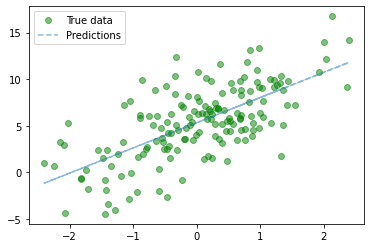

In [66]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

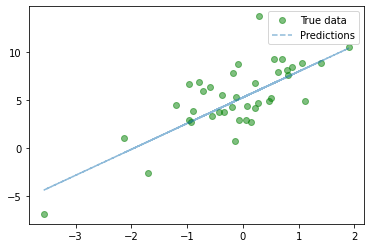

In [67]:
plt.clf()
plt.plot(x_test, y_test, 'go', label='True data', alpha=0.5)
plt.plot(x_test, predicted1, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

(0.0, 100.0)

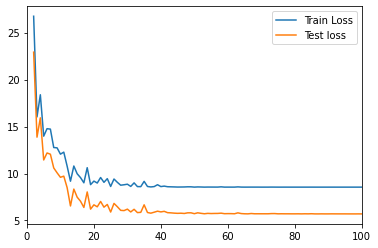

In [68]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

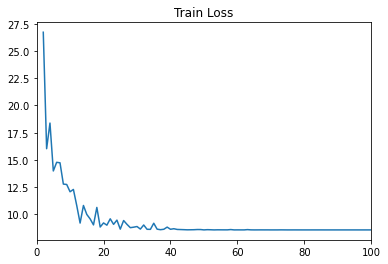

In [74]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

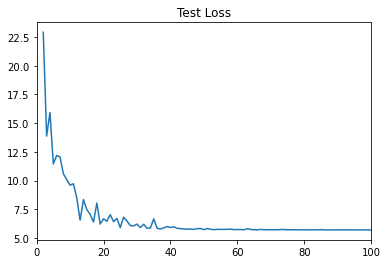

In [71]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)

In [ ]:
test_loss = []
model.eval()
with torch.no_grad():
    for h in range(2, hidden_sizes, 1):
        model = NN(inputDim, h, outputDim)
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
        for epoch in range(epochs):
            if torch.cuda.is_available():
                inputs = Variable(torch.from_numpy(x_test).cuda())
                labels = Variable(torch.from_numpy(y_test).cuda())
            else:
                inputs = Variable(torch.from_numpy(x_test))
                labels = Variable(torch.from_numpy(y_test))
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))
        test_loss.append(loss)

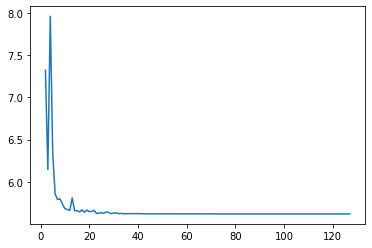

In [17]:
plt.plot(hs, test_losses)


In [ ]:
test_losses